In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plot_img(img):
    plt.figure(figsize=(10,7))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
part1_single_objects = "../Datasets/COTSDataset/Part 1 - Single Objects"
part2_multiple_objects = "../Datasets/COTSDataset/Part 2 - Multiple Objects"
part3_complex_background = "../Datasets/COTSDataset/Part 3 - Complex Background"

In [4]:
img_path = os.path.join(part2_multiple_objects, "academic_book_no", "3_colour.jpeg")
# img_path = os.path.join(part2_multiple_objects, "statues_no", "1_colour.jpeg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask_path = os.path.join(part2_multiple_objects, "academic_book_no", "masks")
# Retrieve all the masks
masks = []
for mask_file in os.listdir(mask_path):
    mask = cv2.imread(os.path.join(mask_path, mask_file))
    masks.append(mask)
# mask_path = os.path.join(part2_multiple_objects, "statues_no", "masks", "statues_no_3_colour_mask_1_mask.png")
# mask = cv2.imread(mask_path)

In [5]:
def extract_bbox(mask):
    # Extracting target bounding box from mask
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = mask.astype(np.uint8)
    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize an empty list to store bounding boxes
    bounding_boxes = []

    # Loop through the detected contours
    for cnt in contours:
        # Get the bounding box for each contour
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Add the bounding box coordinates to the list
        bounding_boxes.append((x, y, x + w, y + h))

    # Find the minimum and maximum coordinates to create a bounding box around all masks
    x1, y1 = min(box[0] for box in bounding_boxes), min(box[1] for box in bounding_boxes)
    x2, y2 = max(box[2] for box in bounding_boxes), max(box[3] for box in bounding_boxes)

    # Create the target bounding box that encompasses all masks
    return np.array([x1, y1, x2, y2])

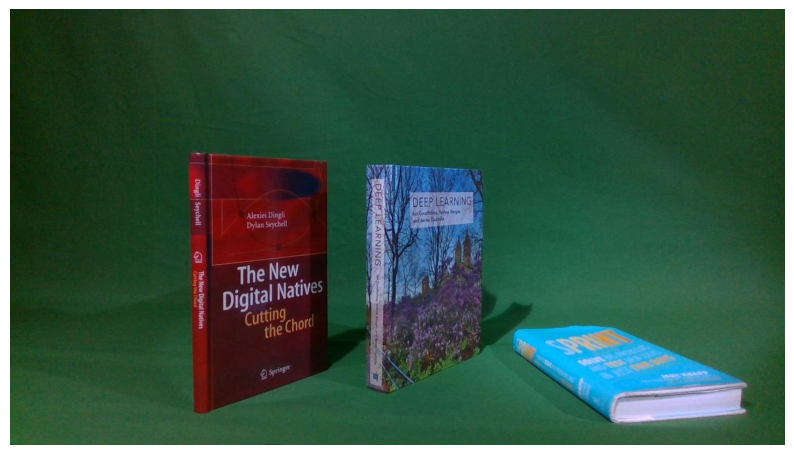

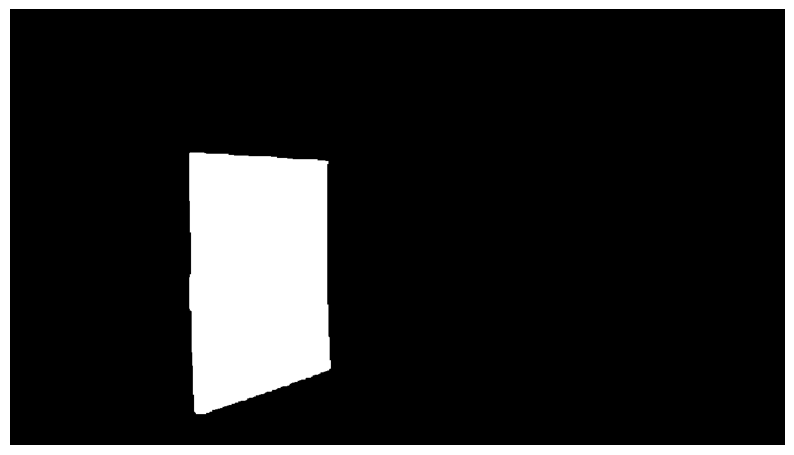

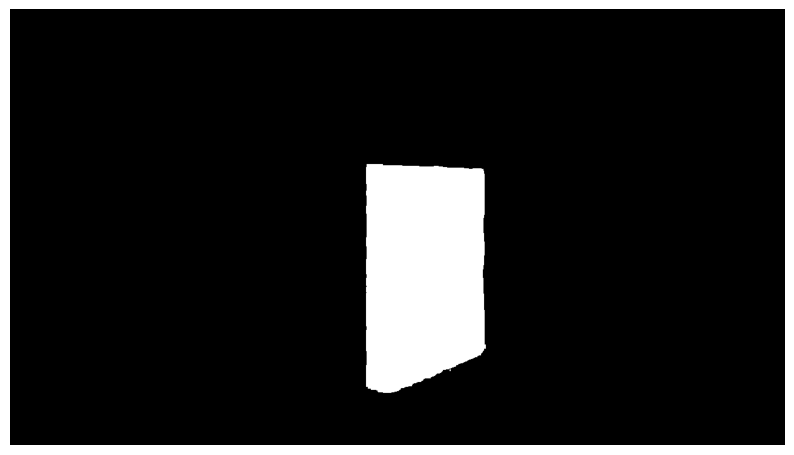

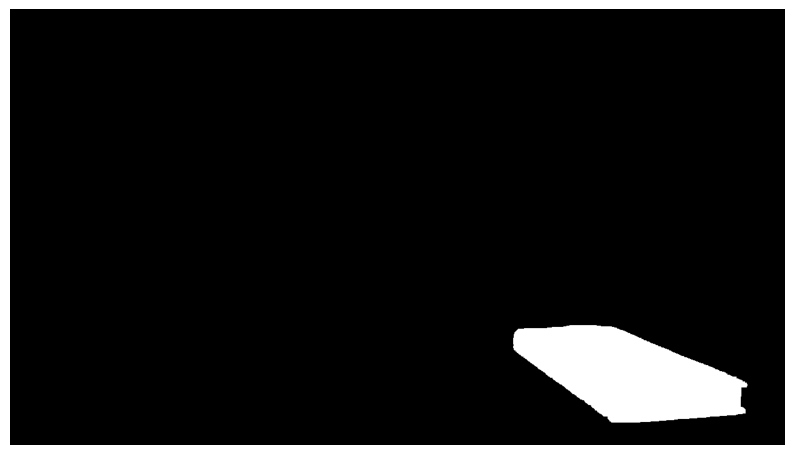

In [6]:
plot_img(img)

gt_bboxes = []

for mask in masks:
    gt_bboxes.append(extract_bbox(mask))
    plot_img(mask)

In [7]:
import SaRLVision as srlv
import gymnasium as gym

In [8]:
from SaRLVision.utils import *
from SaRLVision.agents import *

CUDA is available! Using GPU for computations.


In [9]:
# env_config = {'image': img, 'original_image': img, 'target_gt_boxes': gt_bboxes, 'render_mode': "trigger_image"}
# env = gym.make('DetectionEnv-v0', env_config=env_config)
# _ = env.reset()

env_config = {'dataset': 'PascalVOC2007_2012Dataset', 'dataset_image_set': 'train', 'dataset_year': '2007+2012', 'feature_extractor':MobileNetV2FeatureExtractor(), 'target_size':MOBILENETV2_TARGET_SIZE}#, 'render_mode': "human"}
#'dataset_year': '2007+2012'
env = gym.make('DetectionEnv-v0-Train', env_config=env_config)

Using downloaded and verified file: PascalVOC2007_2012Dataset\VOCtrainval_06-Nov-2007.tar
Extracting PascalVOC2007_2012Dataset\VOCtrainval_06-Nov-2007.tar to PascalVOC2007_2012Dataset
Using downloaded and verified file: PascalVOC2007_2012Dataset\VOCtrainval_11-May-2012.tar
Extracting PascalVOC2007_2012Dataset\VOCtrainval_11-May-2012.tar to PascalVOC2007_2012Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 12880
Current Class: cat


In [10]:
# _ = env.render()

In [11]:
# env.close()

In [12]:
# Creating the environment
# env = DetectionEnv(img, img, target_bbox) #, feature_extractor=ResNet50FeatureExtractor(), target_size=RESNET50_TARGET_SIZE)
# env = gym.make('DetectionEnv-v0', image = img, original_image = img, target_bbox = target_bbox, feature_extractor=ResNet50FeatureExtractor(), target_size=RESNET50_TARGET_SIZE)
# _ = env.reset()

In [13]:
# env = DetectionEnv(img, img, target_bbox, feature_extractor=MobileNetV2FeatureExtractor(), target_size=MOBILENETV2_TARGET_SIZE)
# env = gym.make('DetectionEnv-v0', image = img, original_image = img, target_bbox = target_bbox, feature_extractor=MobileNetV2FeatureExtractor(), target_size=MOBILENETV2_TARGET_SIZE)
# _ = env.reset()

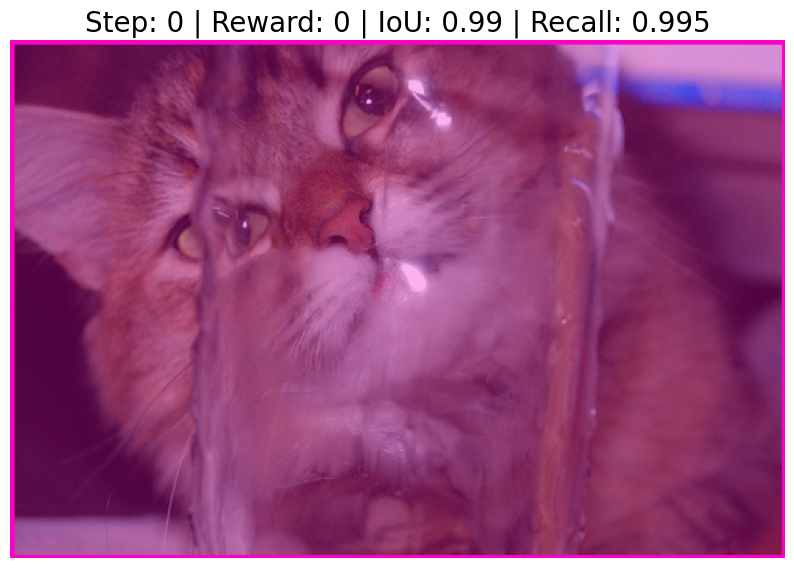

In [14]:
frame = env.display(do_display=True)

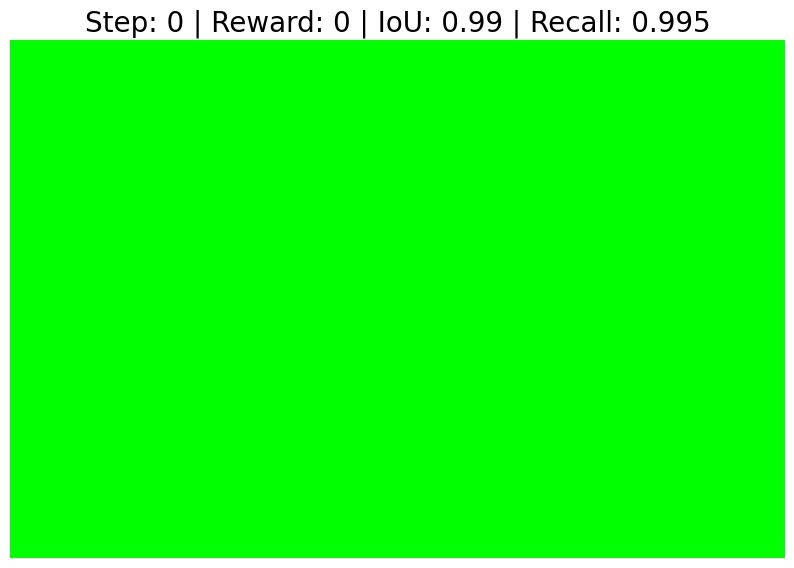

In [15]:
frame = env.display(do_display=True, mode='bbox')

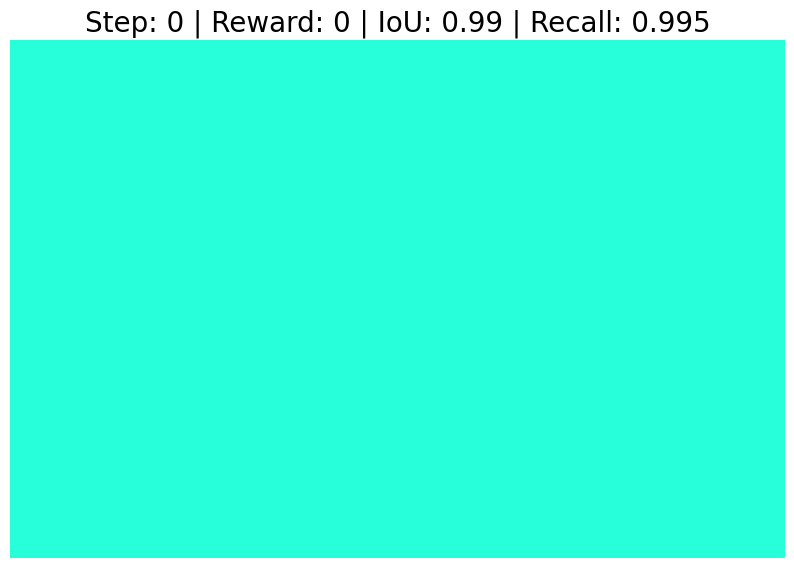

In [16]:
frame = env.display(do_display=True, mode='heatmap')

In [17]:
env.get_actions()

Actions:
0: Move right → 
1: Move left ←
2: Move up ↑
3: Move down ↓
4: Make bigger +
5: Make smaller -
6: Make fatter W
7: Make taller H
8: Trigger T


In [18]:
observation_space, info = env.reset()
# print(observation_space)

In [19]:
env.observation_space

Box(0.0, 10.0, (62810,), float32)

In [20]:
# action = env.action_space.sample()

# env.decode_action(action)

# # Taking a step in the environment
# next_state, reward, terminated, truncated, info = env.step(action)
# print("Terminated: ", terminated)
# print("Truncated: ", truncated)
# print("Reward: ", reward)
# print("IoU", info['iou'])
# print("Recall", info['recall'])
# _ = env.display(do_display=True, mode='image')

In [21]:
# next_state, reward, terminated, truncated, info = env.step(8) #Trigger
# print("Terminated: ", terminated)
# print("Truncated: ", truncated)
# print("Reward: ", reward)
# print("IoU", info['iou'])
# print("Recall", info['recall'])
# _ = env.display(do_display=True, mode='trigger_image')

In [22]:
img_path2 = os.path.join(part2_multiple_objects, "academic_book_no", "2_colour.jpeg")
# img_path = os.path.join(part2_multiple_objects, "academic_book_no", "2_colour.jpeg")
img2 = cv2.imread(img_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

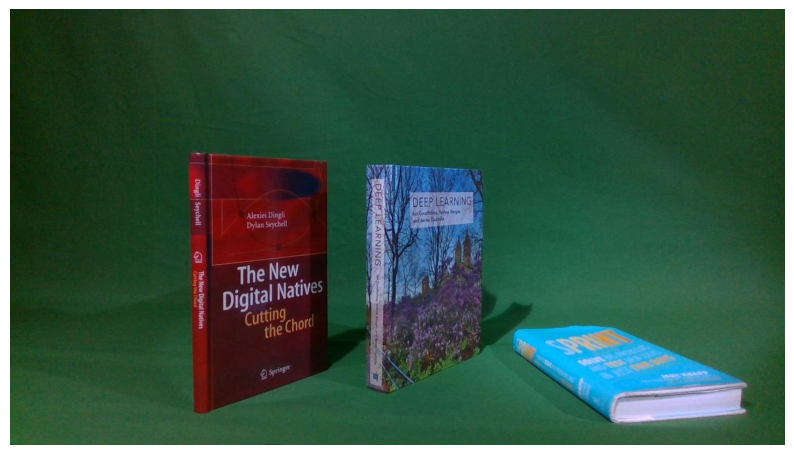

In [23]:
plot_img(img)

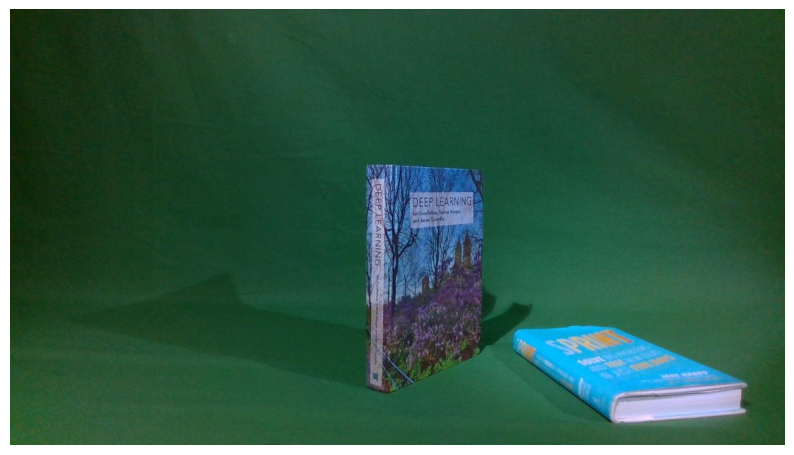

In [24]:
plot_img(img2)

In [25]:
def check(image1, image2):
    for i in range(len(image1)):
        for j in range(len(image1[0])):
            if image1[i][j] != image2[i][j]:
                print("Not equal")
                break

In [26]:
# env_config = {'image': img}
# image1, _ = env.reset(env_config=env_config)
# env_config = {'image': img2}
# image2, _ = env.reset(env_config=env_config)
# check(image1, image2)

In [27]:
# env_config = {'image': img}
# image1, _ = env.reset(env_config=env_config)
# env_config = {'image': img}
# image2, _ = env.reset(env_config=env_config)
# check(image1, image2)

In [28]:
# Multiprocessing to do later
# import multiprocessing as mp

# def worker(env_config, name):
#     env = gym.make('DetectionEnv-v0', env_config=env_config)
#     replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)
#     dqn_agent = DQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)
#     dqn_agent.run()
#     dqn_episode_info = dqn_agent.get_episode_info()
#     print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))
#     dqn_agent.save(path="models/" + name)

# if __name__ == '__main__':
#     env_configs = [{'dataset': 'PascalVOC2007_2012Dataset', 'dataset_image_set': 'train', 'year': '2007+2012'}, 
#                    {'dataset': 'PascalVOC2007_2012Dataset', 'dataset_image_set': 'val', 'year': '2007+2012'}]
#     names = ["Normal DQN 1", "Normal DQN 2"]

#     processes = []
#     for env_config, name in zip(env_configs, names):
#         p = mp.Process(target=worker, args=(env_config, name))
#         p.start()
#         processes.append(p)

#     for p in processes:
#         p.join()

#### DQN Agent

In [29]:
# # Setting name
# name = "Normal DQN MobileNetV2"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env)

# # Creating the DQN agent
# dqn_agent = DQNAgent(env, replay_buffer, name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name + '/' + env.current_class)

In [30]:
# # Setting name
# name = "Normal DQN MobileNetV2"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env)

# # Creating the DQN agent
# dqn_agent = DQNAgent(env, replay_buffer, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name + '/' + env.current_class)
# dqn_agent.epsilon = 0.0

#### Double DQN Agent

In [31]:
# # Setting name
# name = "Double DQN MobileNetV2"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env)

# # Creating the Double DQN agent
# dqn_agent = DoubleDQNAgent(env, replay_buffer , name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name)

In [32]:
# # Setting name
# name = "Double DQN MobileNetV2"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env)

# # Creating the Double DQN agent
# dqn_agent = DoubleDQNAgent(env, replay_buffer, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name)
# dqn_agent.epsilon = 0.0

#### Dueling DQN Agent

In [33]:
# Setting name
name = "Dueling DQN MobileNetV2"

# Creating the Replay_Buffer
replay_buffer = Replay_Buffer(env)

# Creating the Dueling DQN agent
dqn_agent = DuelingDQNAgent(env, replay_buffer, name=name)

# Running the agent
dqn_agent.run()

# Retrieving the episode info
dqn_episode_info = dqn_agent.get_episode_info()

# Printing the time taken to train the agent
print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# Saving the model
dqn_agent.save(path="models/" + name)

Episode: 1 Epsilon: 1.00 Average Reward: 8.32755905511811 Episode Length: 4 Average IoU: 0.63 Average Recall: 0.71 Epochs: 0 Final IoU: 0.62
----------------------------------------------------------------------------------------------------
Episode: 2 Epsilon: 1.00 Average Reward: 6.777466274547007 Episode Length: 1 Average IoU: 0.62 Average Recall: 0.69 Epochs: 0 Final IoU: 0.58
----------------------------------------------------------------------------------------------------
Episode: 3 Epsilon: 1.00 Average Reward: 7.508088110336303 Episode Length: 6 Average IoU: 0.56 Average Recall: 0.80 Epochs: 0 Final IoU: 0.57
----------------------------------------------------------------------------------------------------
Episode: 4 Epsilon: 1.00 Average Reward: 9.323176964178232 Episode Length: 11 Average IoU: 0.50 Average Recall: 0.84 Epochs: 0 Final IoU: 0.33
----------------------------------------------------------------------------------------------------
Episode: 5 Epsilon: 1.00 Ave

In [34]:
# Setting name
name = "Dueling DQN MobileNetV2"

# Creating the Replay_Buffer
replay_buffer = Replay_Buffer(env)

# Creating the Dueling DQN agent
dqn_agent = DuelingDQNAgent(env, replay_buffer, name=name)

# Running the agent
dqn_agent.load(path="models/" + name)
dqn_agent.epsilon = 0.0

#### Noisy DQN Agent

In [35]:
# # Setting the name
# name = "Noisy DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Noisy DQN agent
# dqn_agent = NoisyDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name)

In [36]:
# # Setting name
# name = "Noisy DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Noisy DQN agent
# dqn_agent = NoisyDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name)
# dqn_agent.epsilon = 0.0

#### Double Dueling DQN Agent

In [37]:
# # Setting name
# name = "Double Dueling DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Double Dueling DQN agent
# dqn_agent = DoubleDuelingDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.run()

# # Retrieving the episode info
# dqn_episode_info = dqn_agent.get_episode_info()

# # Printing the time taken to train the agent
# print("Time taken to train the agent: {:.2f} seconds".format(dqn_episode_info["eps_duration"]))

# # Saving the model
# dqn_agent.save(path="models/" + name)

In [38]:
# # Setting name
# name = "Double Dueling DQN"

# # Creating the Replay_Buffer
# replay_buffer = Replay_Buffer(env, BUFFER_SIZE, MIN_REPLAY_SIZE, BATCH_SIZE)

# # Creating the Double Dueling DQN agent
# dqn_agent = DoubleDuelingDQNAgent(env, replay_buffer, TARGET_UPDATE_FREQ, name=name)

# # Running the agent
# dqn_agent.load(path="models/" + name)
# dqn_agent.epsilon = 0.0

In [39]:
dqn_episode_info = dqn_agent.get_episode_info()

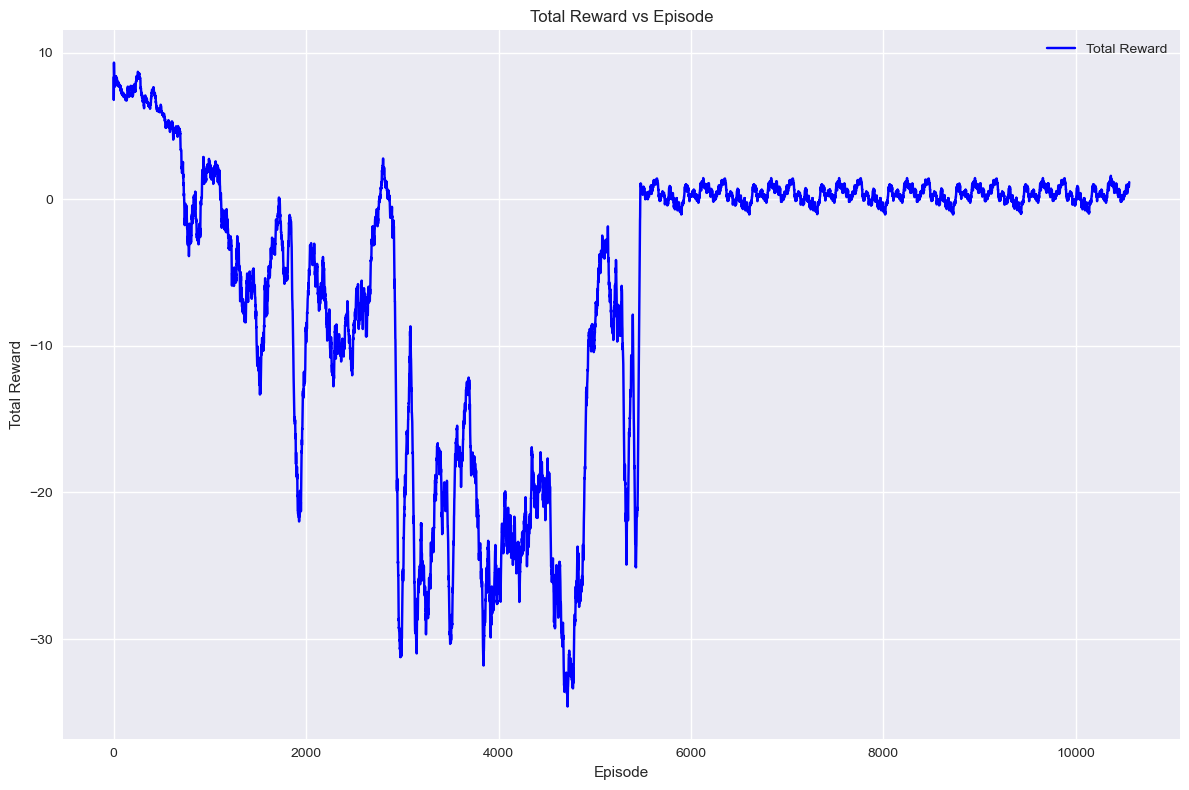

In [40]:
rewards_list = dqn_episode_info["episode_avg_rewards"]
# Plotting the rewards
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(rewards_list, label='Total Reward', color='blue')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Episode')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

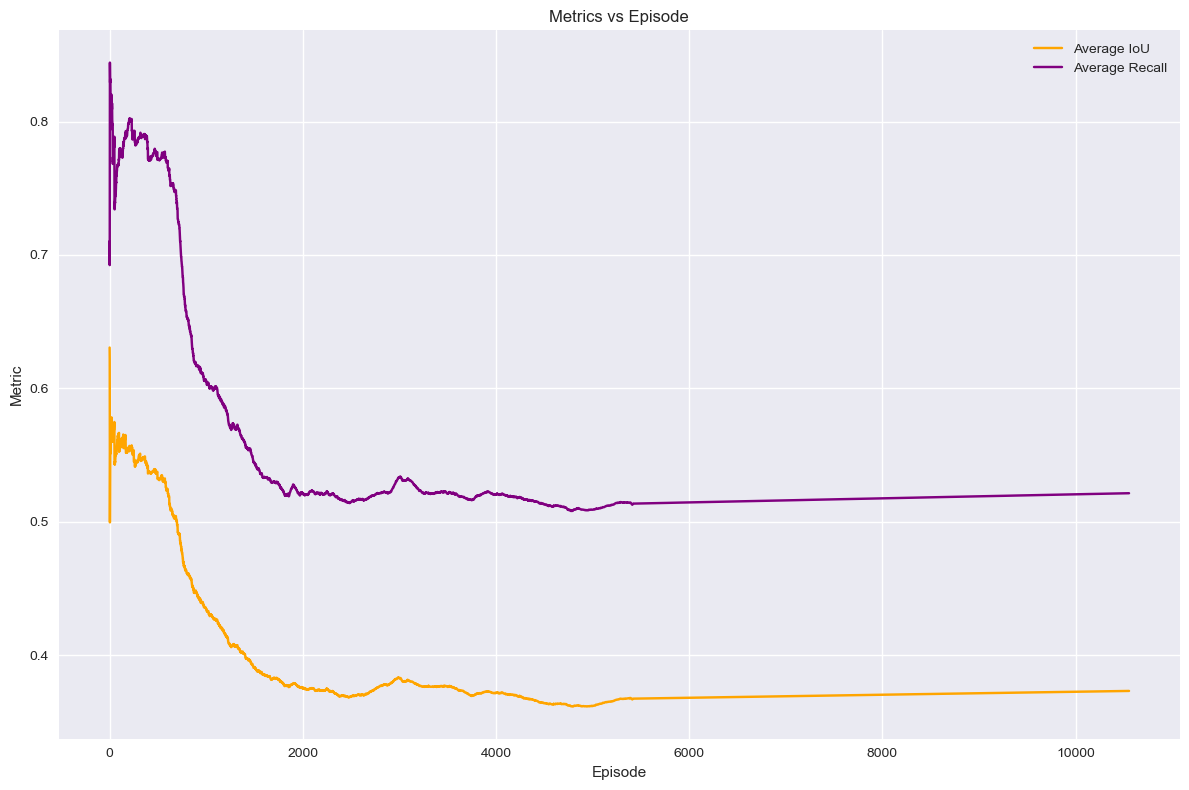

In [41]:
iou_list = dqn_episode_info["avg_iou"]
recall_list = dqn_episode_info["avg_recall"]

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(iou_list, label='Average IoU', color='orange')
plt.plot(recall_list, label='Average Recall', color='purple')
plt.xlabel('Episode')
plt.ylabel('Metric')
plt.title('Metrics vs Episode')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [42]:
# Predicting the bounding box
env.reset()
# env.display(do_display=True, mode='image')
state = env.get_state()

total_reward = 0

terminated = False
truncated = False

while True:
    action = dqn_agent.select_action(state)
    next_state, _, terminated, truncated, info = env.step(action)
    env.decode_action(action)
    done = truncated or terminated

    state = next_state
    # env.display(do_display=True, mode='image')
    if done:
        break

print(f"Total Reward: {total_reward}, IoU: {info['iou']}, Recall: {info['recall']}, Steps: {env.step_count}")

8: Trigger T
Total Reward: 0, IoU: 0.656992, Recall: 1.0, Steps: 1


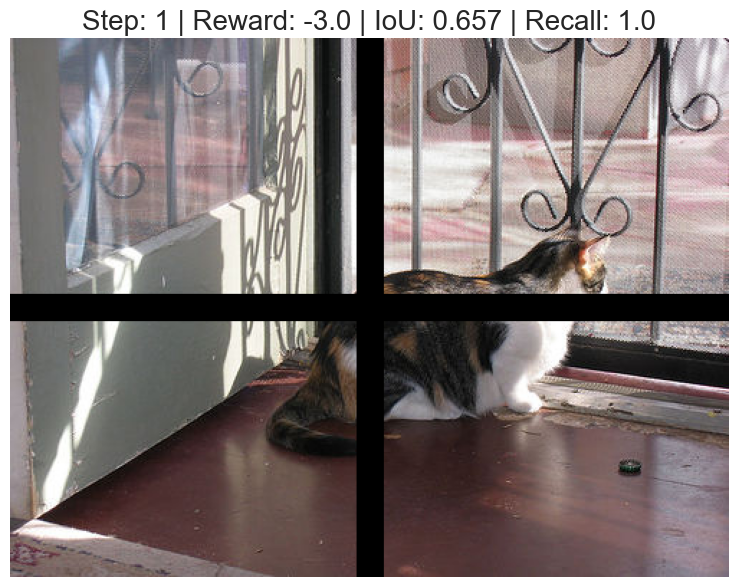

In [43]:
_ = env.display(do_display=True, mode='trigger_image')

In [44]:
# env.test()

In [45]:
dqn_agent.test(file_path=name)#, video_filename='test.mp4')

Video saved to: Dueling DQN MobileNetV2\output_video.mp4


In [46]:
dqn_agent.save_gif(file_path=name)

GIF saved to: Dueling DQN MobileNetV2\output.gif


In [47]:
env.classification_dictionary

{'label': ['Appenzeller'],
 'confidence': [0.2181908],
 'bbox': [[0, 0, 375, 500]],
 'color': [(98, 255, 0)]}

In [48]:
env.test()

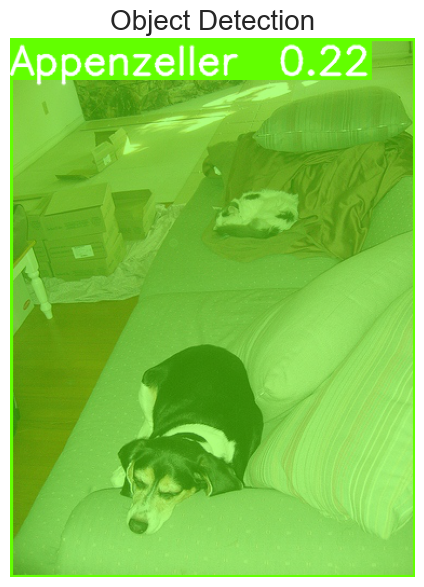

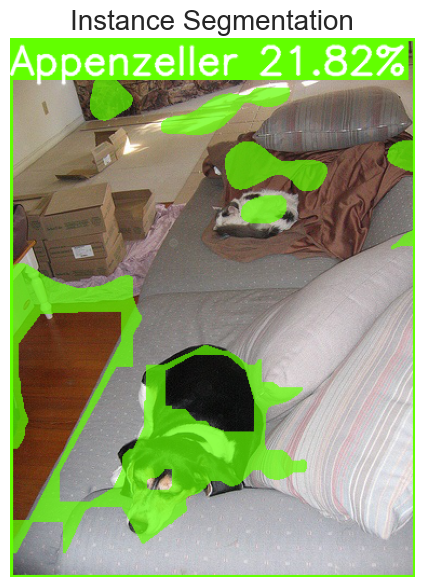

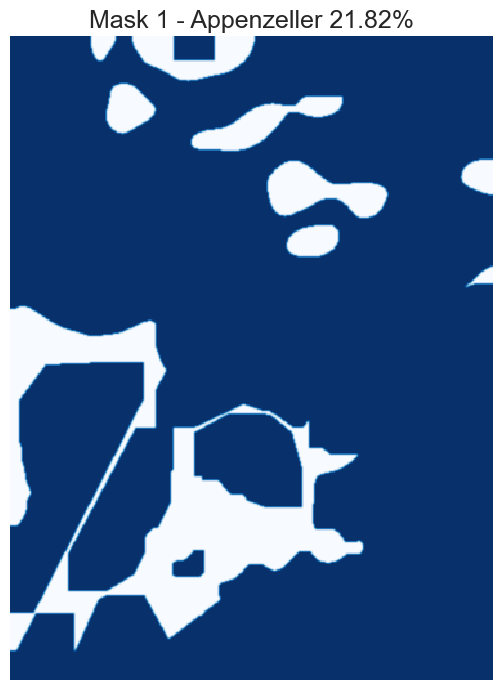

In [49]:
prediction = env.predict()
mask_dictionary = env.segment(do_display=True, display_mode='image')
mask_dictionary = env.segment(do_display=True)

Executing COCO

 Annotating image:  Mask Name


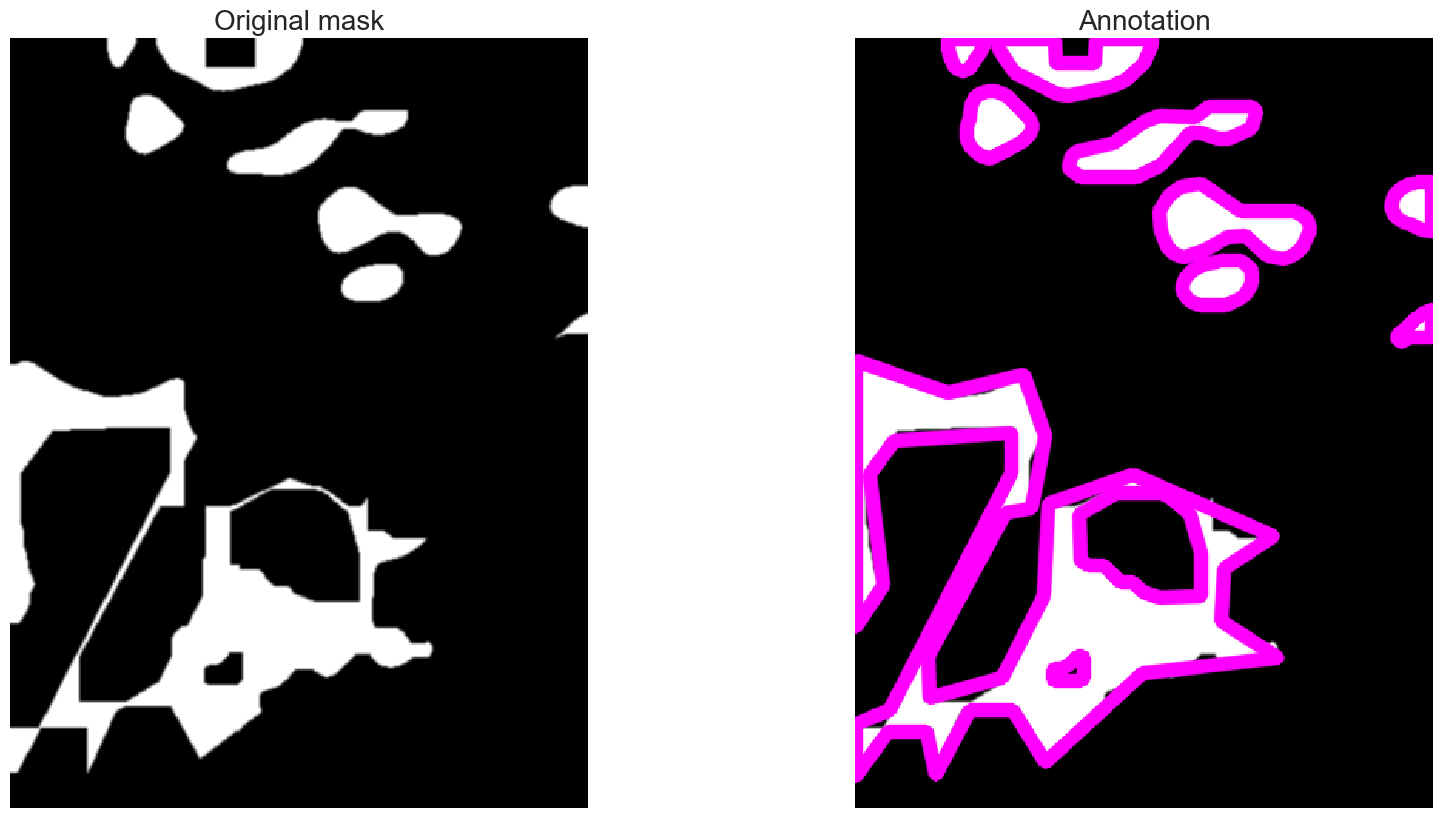

 Succesfully saved image:  Mask Name 


------------------------------------------------------------------------------------------------------------------------
Executing VGG

 Annotating image:  Mask Name


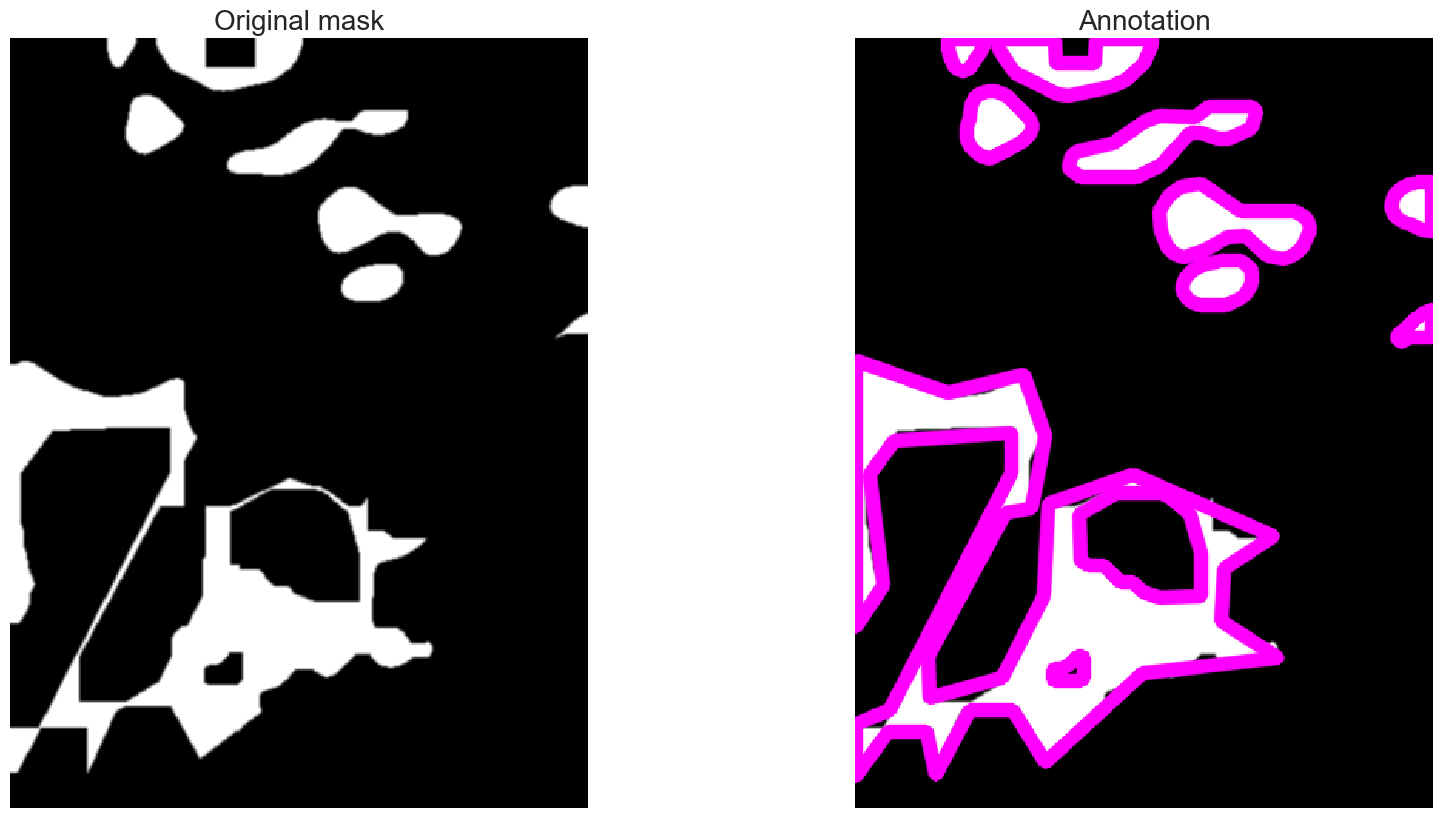

 Succesfully saved image:  Mask Name 


------------------------------------------------------------------------------------------------------------------------
Executing YOLO

 Annotating image:  Mask Name


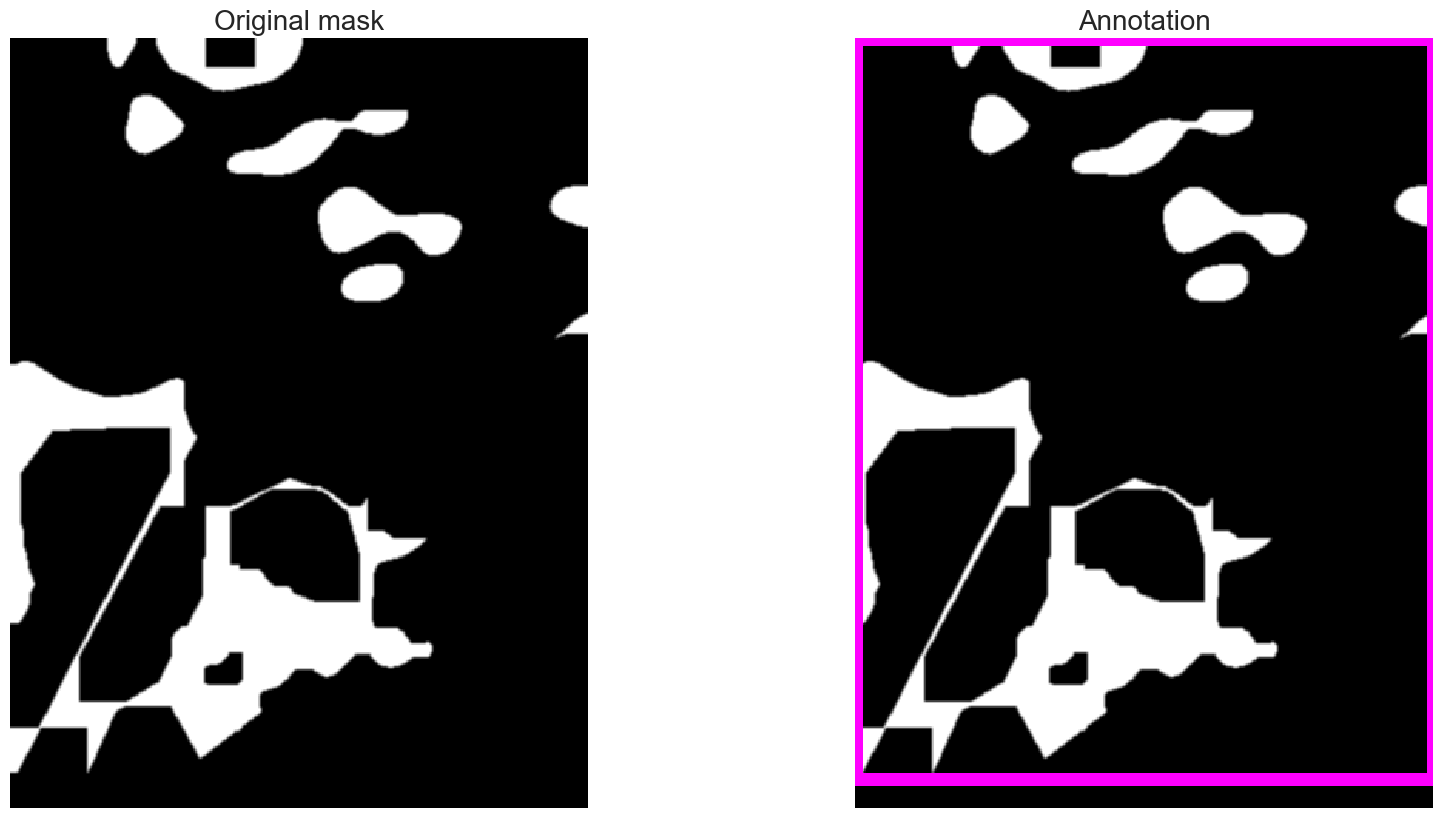

 Succesfully saved image:  Mask Name 


------------------------------------------------------------------------------------------------------------------------


In [50]:
# Applying Mask to Annotation
# Extracting the first mask
mask = mask_dictionary['masks'][0]
category = mask_dictionary['labels'][0]
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

print('\033[32m' + "Executing COCO" + '\033[0m')
env.annotate(mask, "Mask Id", "Mask Name" ,"Object Detection", "Annotations/COCO_annotations", do_display=True, annotation_format="coco", do_save=True, category=category)
print('\033[32m' + "Executing VGG" + '\033[0m')
env.annotate(mask, "Mask Id", "Mask Name" ,"Object Detection", "Annotations/VGG_annotations", do_display=True, annotation_format="vgg", do_save=True, category=category)
print('\033[32m' + "Executing YOLO" + '\033[0m')
env.annotate(mask, "Mask Id", "Mask Name" ,"Object Detection", "Annotations/YOLO_annotations", do_display=True, annotation_format="yolo", do_save=True, category=category)

USE IOU FOR CROPPPING EXPERIMENT IOU WITH THE GROUND TRUTH BOUNDING BOX VS IOU WITH SARA FROM GENERATED BOUNDING BOXES WITH COCO DATASET

In [51]:
# # Predicting the bounding box with a different network
# env.reset(classifier=MobileNetV2(), target_size=MOBILENETV2_TARGET_SIZE)
# env.display(do_display=True, mode='image')
# state = env.get_state()

# total_reward = 0

# terminated = False
# truncated = False

# while True:
#     action = dqn_agent.select_action(state)
#     next_state, _, terminated, truncated, info = env.step(action)
#     env.decode_action(action)
#     done = truncated or terminated

#     state = next_state

#     env.display(do_display=True, mode='image')
#     if done:
#         break

# print(f"Total Reward: {total_reward}, IoU: {info['iou']}, Recall: {info['recall']}, Steps: {env.step_count}")
# prediction = env.predict()

In [52]:
env.close()

#### RLLIB - Forget for now

In [53]:
# #conda install conda-forge::ray-rllib
# #conda install conda-forge::ray-tune
# from ray.rllib.algorithms.ppo import PPOConfig
# from ray.tune.logger import pretty_print
# from ray.tune.registry import register_env

# from SaRLVision.env import DetectionEnv
# # Register the environment to ray.tune
# register_env("DetectionEnv-v0", DetectionEnv)

# algo = (
#     PPOConfig()
#     .rollouts(num_rollout_workers=1)
#     .resources(num_gpus=0)
#     .environment(env="DetectionEnv-v0", disable_env_checking=False)  # Pass the env_config here
#     .build()
# )

# for i in range(10):
#     result = algo.train()
#     print(pretty_print(result))

#     if i % 5 == 0:
#         checkpoint_dir = algo.save().checkpoint.value
#         print(f"Checkpoint saved in directory {checkpoint_dir}")



##### Evaluation

In [54]:
env_config = {'dataset': 'PascalVOC2007Dataset', 'dataset_image_set': 'test', 'dataset_year': '2007'}#, 'render_mode': "trigger_image"}
env2 = gym.make('DetectionEnv-v0-Test', env_config=env_config)

# Setting environment configuration
env2.test()

# Setting name
name = "Double DQN MobileNetV2"

# Creating the Replay_Buffer
replay_buffer = Replay_Buffer(env)

# Creating the Double DQN agent
dqn_agent = DoubleDQNAgent(env, replay_buffer, name=name)

# Running the agent
dqn_agent.load(path="models/" + name)
dqn_agent.epsilon = 0.0

dqn_agent.evaluate()

Using downloaded and verified file: PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to PascalVOC2007Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 7632
Current Class: cat


In [55]:
env2.classification_dictionary

{'label': [], 'confidence': [], 'bbox': [], 'color': []}

In [56]:
env2.evaluation_results

{'class': 'cat',
 'gt_boxes': {},
 'bounding_boxes': {},
 'total_images': 332,
 'labels': {},
 'confidences': {}}

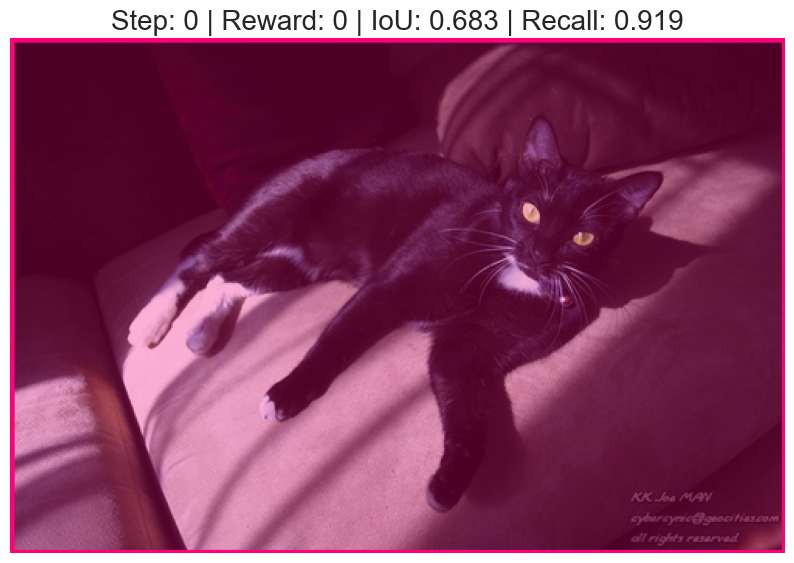

In [57]:
_ = env2.display(do_display=True, mode='image')

In [58]:
# Specify the file path
file_path = 'evaluation_results'

dfs, mAps = calculate_detection_metrics(file_path)

    average_iou average_precision average_precision_voc iou_threshold  \
cat         NaN               NaN                   0.0           0.5   

    num_images  
cat          0  
